In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd
import math, datetime
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import svm
# from sklearn import cross_validation
from sklearn.linear_model import LinearRegression, BayesianRidge, ARDRegression

In [2]:
#importing unemployment data for unemployment rate prediction model
unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/unemployment_rate_model_data.csv', header=0, 
                  index_col='date',
                  parse_dates=True)
unemployment.head()

,unemployment_rate,date.1
date,,
1948-01-01,3.3,1/1/1948
1948-04-01,3.3,4/1/1948
1948-07-01,3.3,7/1/1948
1948-10-01,3.4,10/1/1948
1949-01-01,4.1,1/1/1949


In [3]:
unemployment['date_1'] = pd.to_datetime([
     '-'.join(x.split()[::-1]) for x in unemployment['date.1']])

In [4]:
unemployment = unemployment.drop(columns = ["date.1"])

In [5]:
unemployment.head()

,unemployment_rate,date_1
date,,
1948-01-01,3.3,1948-01-01
1948-04-01,3.3,1948-04-01
1948-07-01,3.3,1948-07-01
1948-10-01,3.4,1948-10-01
1949-01-01,4.1,1949-01-01


In [6]:
# Read the csv file into a pandas DataFrame
gdp = pd.read_csv('../../Clean Data/pandas_cleaned/gdp_clean_model_data.csv',
                 header = 0,
                 index_col = "date",
                 parse_dates = True)
gdp.head()

,GDP_in_millions,date_1
date,,
1948-01-01,265742,1/1/1948
1948-04-01,272567,4/1/1948
1948-07-01,279196,7/1/1948
1948-10-01,280366,10/1/1948
1949-01-01,275034,1/1/1949


In [7]:
gdp['date_1'] = pd.to_datetime([
     '-'.join(x.split()[::-1]) for x in gdp['date_1']])

In [8]:
gdp.tail()

,GDP_in_millions,date_1
date,,
2019-01-01,21098827,2019-01-01
2019-04-01,21340267,2019-04-01
2019-07-01,21542540,2019-07-01
2019-10-01,21729124,2019-10-01
2020-01-01,21537940,2020-01-01


In [9]:
gdp_unemployment = pd.read_csv('../../Clean Data/pandas_cleaned/GDP_Unemployment_model_data.csv', 
header=0, 
index_col='date',
parse_dates=True)

gdp_unemployment.head()

,unemployment_rate,GDP_in_millions
date,,
1948-01-01,3.3,265742
1948-04-01,3.3,272567
1948-07-01,3.3,279196
1948-10-01,3.4,280366
1949-01-01,4.1,275034


In [10]:
X = unemployment.date_1.values.reshape(-1, 1)
y = unemployment.unemployment_rate.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


C:\Users\stroh\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Unemployment Rate(%)')

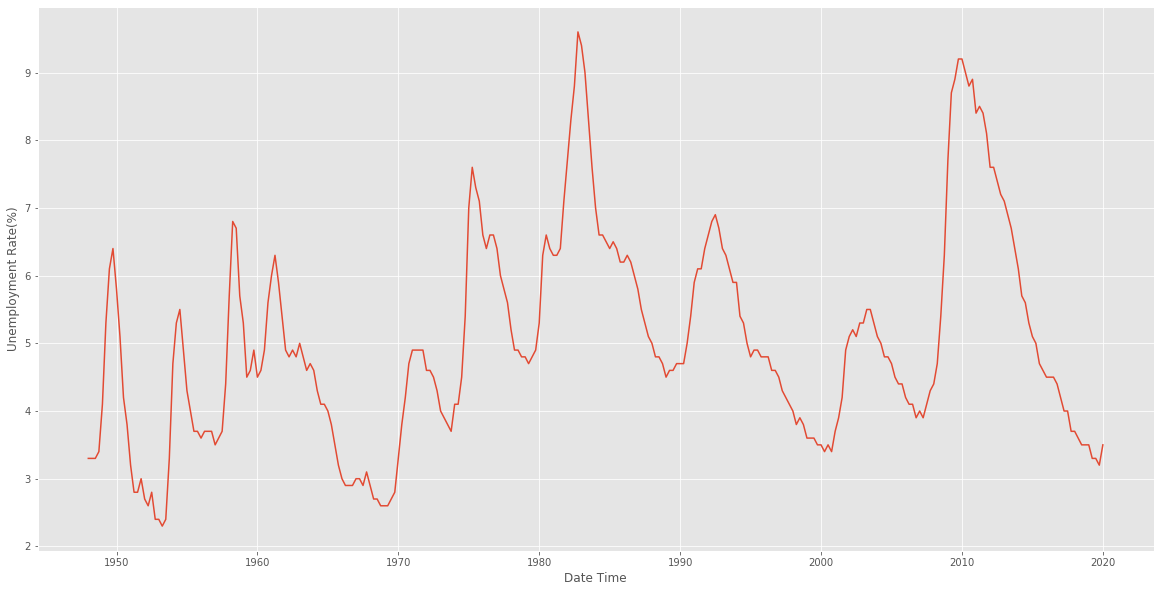

In [11]:
from matplotlib.pyplot import figure
figure (figsize = (20, 10))
plt.plot(X, y)
plt.xlabel("Date Time")
plt.ylabel("Unemployment Rate(%)")

Text(0, 0.5, 'GDP in 10 Trillions (USD)')

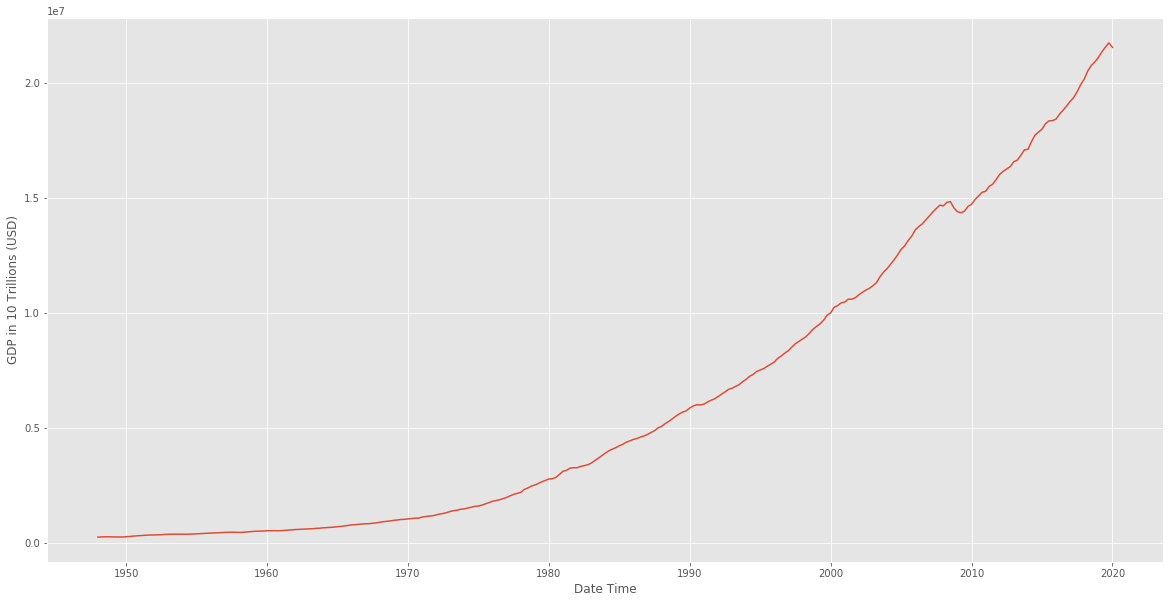

In [12]:
X = gdp.date_1.values.reshape(-1, 1)
y = gdp.GDP_in_millions.values.reshape(-1, 1)

figure (figsize = (20,10))
plt.plot(X, y)
plt.xlabel("Date Time")
plt.ylabel("GDP in 10 Trillions (USD)")

In [13]:
X = gdp_unemployment["GDP_in_millions"].values.reshape(-1, 1)
y = gdp_unemployment["unemployment_rate"].values.reshape(-1,1)

print(X.shape, y.shape)

(289, 1) (289, 1)


Text(0, 0.5, 'Unemployment Rate')

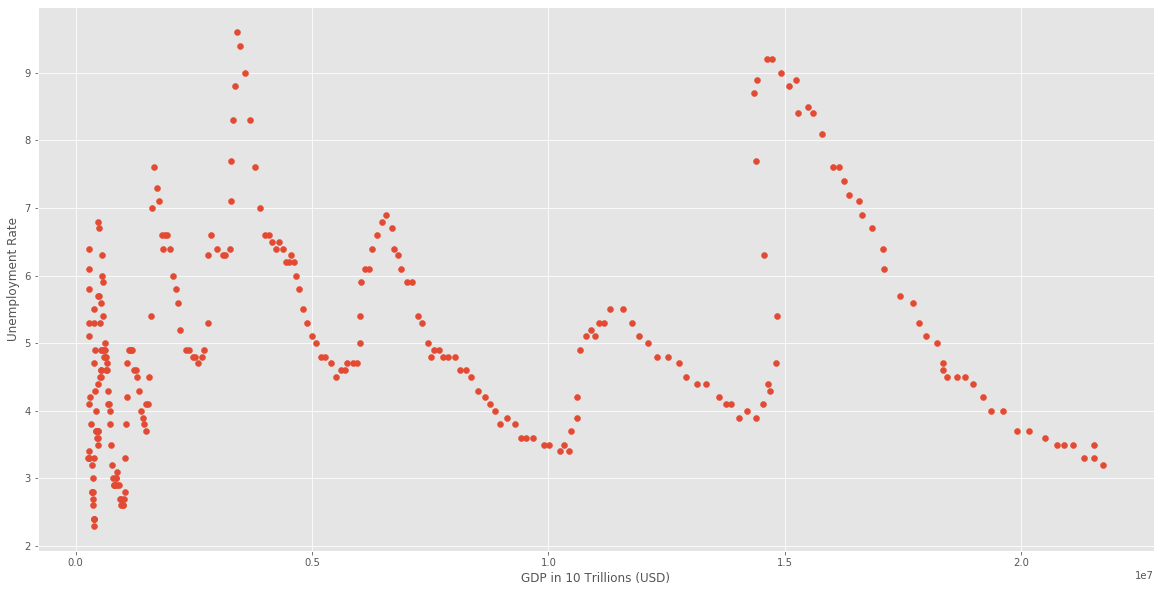

In [14]:
from matplotlib.pyplot import figure
figure (figsize = (20, 10))
plt.scatter(X, y)
plt.xlabel("GDP in 10 Trillions (USD)")
plt.ylabel("Unemployment Rate")

In [15]:
#Running a correlation of the two main variables, it is clear that in the US
# unemployment rate and GDP have very little to do with each other
gdp_unemployment.corr()

,unemployment_rate,GDP_in_millions
unemployment_rate,1.000000,0.165823
GDP_in_millions,0.165823,1.000000


In [16]:
# Beginning of Unemployment Rate prediction model 

unemp_df = unemployment[["unemployment_rate", "date_1"]]
forecast_col = "unemployment_rate"
forecast_out = int(math.ceil(0.01*len(unemp_df)))
unemp_df["label"] = unemp_df[forecast_col].shift(-forecast_out)

In [17]:
print(unemp_df.count())

unemployment_rate    289
date_1               289
label                286
dtype: int64


In [18]:

X = np.array(unemp_df.drop(["label", "date_1"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [19]:
unemp_df.dropna(inplace = True)
y = np.array(unemp_df["label"])
y = np.array(unemp_df["label"])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [21]:
# tried SVM, svm.SVR with default kernel RBF, ARD, BayesianRidge and others
model = svm.SVR("poly", degree =1)
model.fit(X_train, y_train)

C:\Users\stroh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=1, epsilon=0.1,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [22]:
accuracy = model.score(X_test, y_test)
print(accuracy)
print (f"Forecast out is: {forecast_out} Quarters")

0.4950511230534247
Forecast out is: 3 Quarters


In [23]:
forecast_set = model.predict(X_lately)

In [24]:
print(forecast_set, accuracy, forecast_out)

[3.4314287  3.4314287  3.25428584] 0.4950511230534247 3


In [25]:
unemp_df["Forecast"] = np.nan

In [26]:
last_quarter = unemp_df.iloc[-1].name
last_date = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_date = last_date + one_quarter

In [27]:
for i in forecast_set:
    next_quarter = datetime.datetime.fromtimestamp(next_date)
    next_date += one_quarter
    unemp_df.loc[next_quarter] = [np.nan for _ in range(len(unemp_df.columns)-1)] + [i]

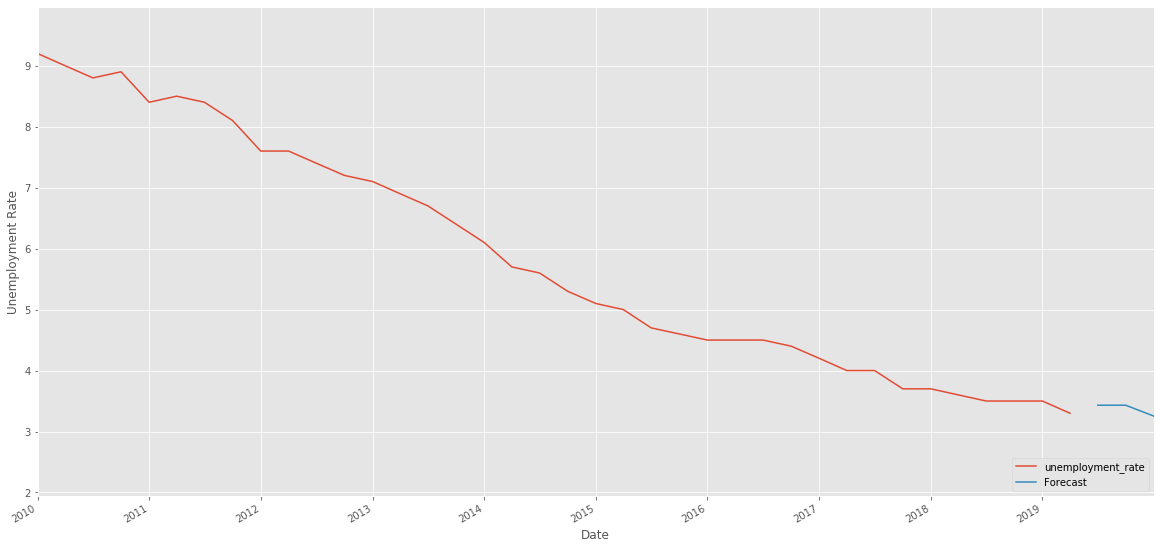

In [28]:
figure (figsize = (20, 10))
unemp_df["unemployment_rate"].plot()
unemp_df["Forecast"].plot()
plt.xlim(left= pd.to_datetime("2010-01-01"))
plt.legend(loc=4)
# plt.xlim(2000, 2020)
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")

plt.show()

In [29]:
# Beginning of GDP prediction model 
X = gdp.date_1.values.reshape(-1, 1)
y = gdp.GDP_in_millions.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)

Shape:  (289, 1) (289, 1)


Text(0, 0.5, 'GDP in 10 Trillions (USD)')

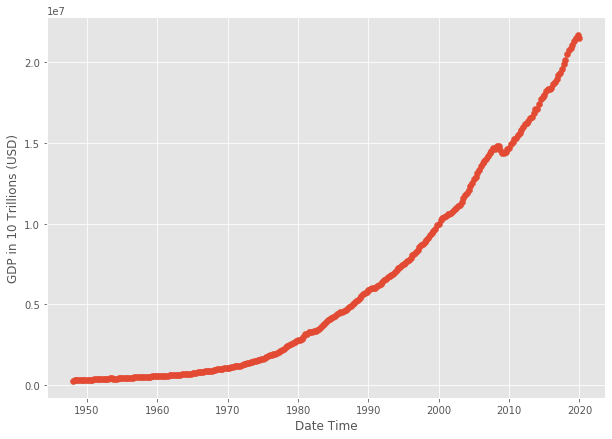

In [30]:
figure (figsize = (10,7))
plt.scatter(X, y)
plt.xlabel("Date Time")
plt.ylabel("GDP in 10 Trillions (USD)")

In [31]:
gdp_df = gdp[["GDP_in_millions", "date_1"]]
forecast_col = "GDP_in_millions"
forecast_out = int(math.ceil(0.05*len(gdp_df)))
gdp_df["label"] = gdp_df[forecast_col].shift(-forecast_out)

In [32]:
print(gdp_df.count())

GDP_in_millions    289
date_1             289
label              274
dtype: int64


In [33]:
X = np.array(gdp_df.drop(["label", "date_1"],1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

In [34]:
gdp_df.dropna(inplace = True)
y = np.array(gdp_df["label"])
y = np.array(gdp_df["label"])

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [36]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
accuracy = model.score(X_test, y_test)
print(accuracy)
print(f"Forecast out is = {forecast_out}")

0.9952352081276723
Forecast out is = 15


In [38]:
forecast_set = model.predict(X_lately)
print(forecast_set, accuracy, forecast_out)

[18961712.94375693 19201815.77541516 19279676.46313281 19519886.39810041
 19786948.5000021  19811352.10298062 20185477.63535556 20514476.21378676
 20660609.56424008 20813591.82950822 21081608.74601893 21224384.29378396
 21231348.2876865  21315046.10576455 21557703.46529083] 0.9952352081276723 15


In [39]:
gdp_df["Forecast"] = np.nan

In [40]:
last_quarter = gdp_df.iloc[-1].name
last_date = last_quarter.timestamp()
one_quarter = 3*(2628000)
next_date = last_date + one_quarter

In [41]:
for i in forecast_set:
    next_quarter = datetime.datetime.fromtimestamp(next_date)
    next_date += one_quarter
    gdp_df.loc[next_quarter] = [np.nan for x in range(len(gdp_df.columns)-1)] + [i]

Text(0, 0.5, 'GDP in 10 Trillions (USD)')

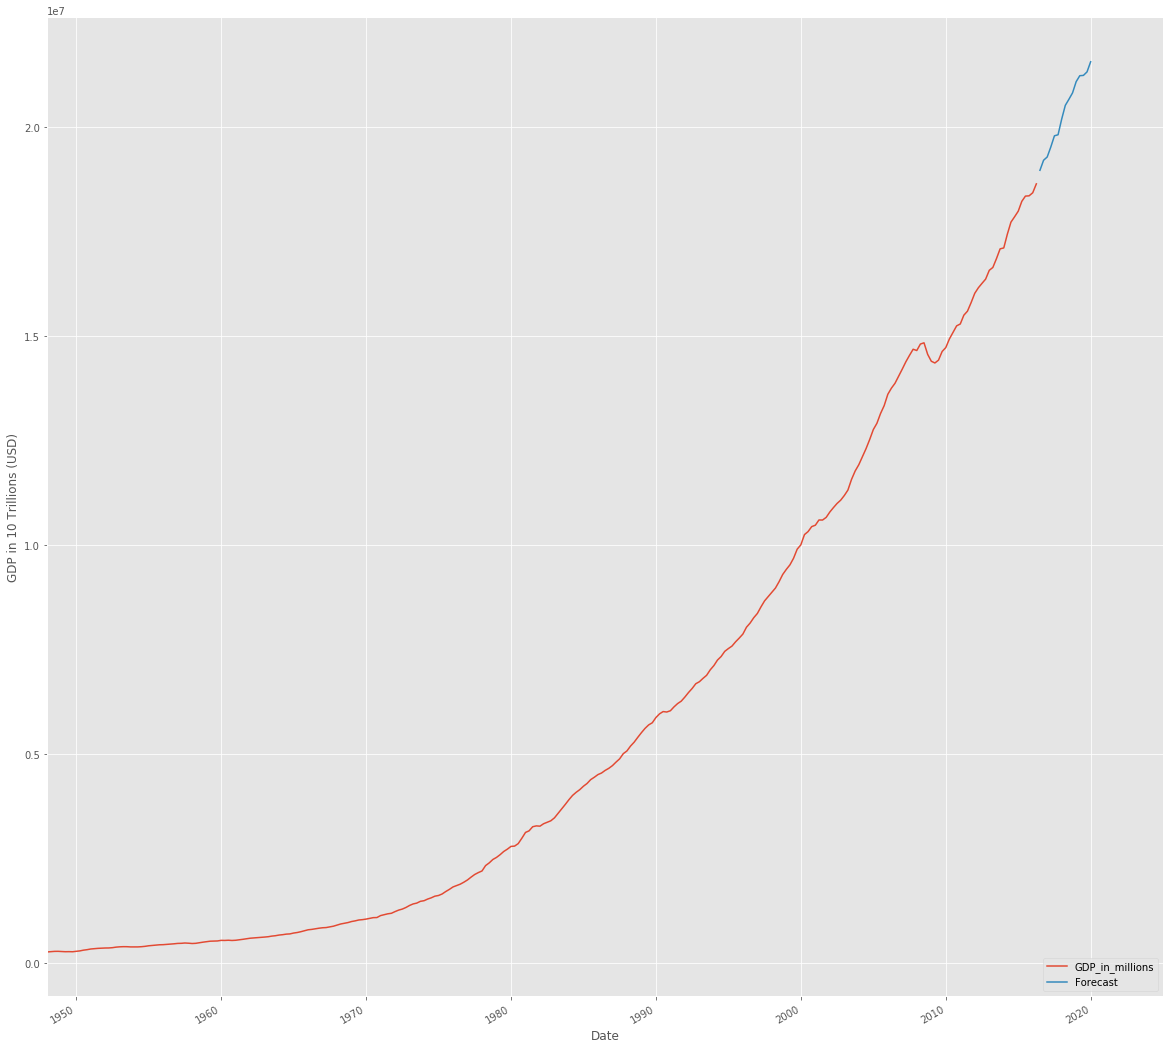

In [42]:
figure(figsize = (20, 20))
gdp_df["GDP_in_millions"].plot()
gdp_df["Forecast"].plot()
plt.xlim(right = pd.to_datetime("2025-01-01"))
plt.legend(loc=4)
plt.xlabel("Date")
plt.ylabel('GDP in 10 Trillions (USD)')

